In [479]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import halfnorm
from random import sample
from random import choices
import math
import random
import statistics

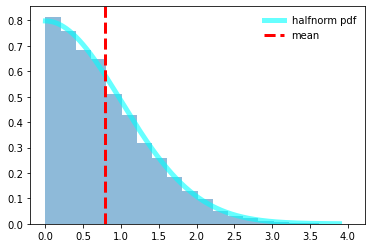

mean: 0.795


In [522]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = halfnorm.stats(moments='mvsk')
x = np.linspace(halfnorm.ppf(0.0001),
                halfnorm.ppf(0.9999), 10000)
plt.plot(x, halfnorm.pdf(x),
       'cyan', lw=5, alpha=0.6, label='halfnorm pdf')
#rv = halfnorm()
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
#vals = halfnorm.ppf([0.001, 0.5, 0.999])
#np.allclose([0.001, 0.5, 0.999], halfnorm.cdf(vals))
r = halfnorm.rvs(size=10000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5,bins=20)
ax.axvline(np.mean(r),color='red',ls='--',lw='3',label='mean')
ax.legend(loc='best', frameon=False)
plt.show()
mean=np.mean(r)
var=np.var(r)
print('mean:',round(mean,3))
#print("var:",round(var,3))

In [523]:
random.seed(1)
sample_x=sample(list(r),100)#random sample/ sample data
est_mean=np.mean(sample_x)
print("estimated mean value :",round(est_mean,4))

estimated mean value : 0.8146


In [524]:
#draw samples from real distributions
M=[]
random.seed(1)
for i in range(10000):
    sample_mean=np.mean(sample(list(r),100))
    M.append(sample_mean) 

mean value: 0.7946
se of mean value: 0.0599
confidence interval for mean value is [0.6803 , 0.9138]


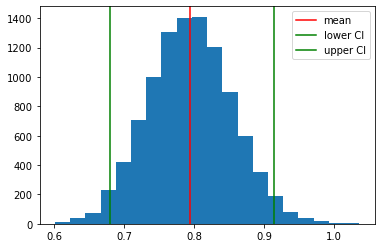

In [525]:
plt.hist(M,bins=20)
plt.axvline(np.mean(M),color='red',label='mean')
q1=round(np.quantile(M,q=0.025),4)
q2=round(np.quantile(M,q=0.975),4)
plt.axvline(q1,color='green',label='lower CI')
plt.axvline(q2,color='green',label='upper CI')
plt.legend()
print('mean value:',round(np.mean(M),4))
print("se of mean value:",round(math.sqrt(np.var(M)),4))
print('confidence interval for mean value is [{} , {}]' .format (q1,q2))

In [526]:
def bootstrap(sample,B=2000,seed=1,func=None):
    Boot=[]
    random.seed(seed)
    for iteration in range(B):
        boot_sample=choices(sample,k=len(sample))
        boot_mean=np.mean(boot_sample)
        Boot.append(boot_mean)
    se=math.sqrt(np.var(Boot))
    return (se,Boot)

In [527]:
test=bootstrap(sample_x,B=2000,seed=1)
se=test[0]
theory_se=math.sqrt(var/len(sample_x))
print("boostrap estimated standard error:",round(se,4))
print("theoretical standard error:",round(theory_se,4))

boostrap estimated standard error: 0.0718
theoretical standard error: 0.0605


(array([  5.,  48., 170., 471., 549., 430., 241.,  58.,  22.,   6.]),
 array([0.57329764, 0.62501004, 0.67672244, 0.72843484, 0.78014724,
        0.83185964, 0.88357203, 0.93528443, 0.98699683, 1.03870923,
        1.09042163]),
 <a list of 10 Patch objects>)

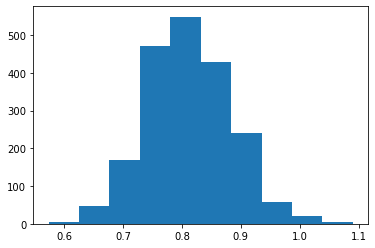

In [528]:
plt.hist(test[1])

In [530]:
#bootstrap CI
q1_est=round(np.quantile(test[1],q=0.025),4)
q2_est=round(np.quantile(test[1],q=0.975),4)

#rough CI
q_1=round(est_mean-1.96*theory_se,4)
q_2=round(est_mean+1.96*theory_se,4)

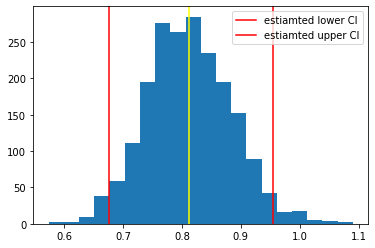

In [531]:
plt.hist(test[1],bins=20)
plt.axvline(q1_est,color='r',label='estiamted lower CI')
plt.axvline(q2_est,color='r',label='estiamted upper CI')
#plt.axvline(q1,color='green',label='lower CI')
#plt.axvline(q2,color='green',label='upper CI')
plt.axvline(np.mean(test[1]),color='yellow')
plt.legend(loc='best')


In [532]:
print('real CI [{} , {}]' .format (q1,q2))
print('estimated CI [{} , {}]' .format (q1_est,q2_est))
print('rough CI [{} , {}]' .format (q_1,q_2))

real CI [0.6803 , 0.9138]
estimated CI [0.6752 , 0.9554]
rough CI [0.696 , 0.9332]


## Poisson

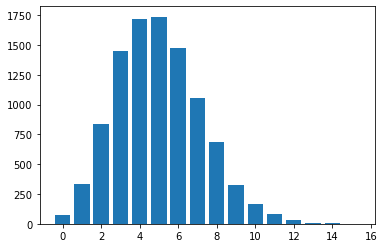

mean: 4.98
var: 4.942


In [474]:
from scipy.stats import poisson
np.random.seed(1)
s = np.random.poisson(5, 10000)
keys, counts = np.unique(s, return_counts=True)
plt.bar(keys, counts)
plt.show()
mean=np.mean(s)
var=np.var(s)
stat=np.mean([x**2 for x in list(s)])#sum of x**2
print('mean:',round(mean,3))
print('mean square:',round(mean**2,3))
print("var:",round(var,3))
#print('self defined statistics:',stat)


In [ ]:
#5*5+5=30 real value

In [507]:
#draw samples from real distributions
#M=[];V=[]
R=[]
np.random.seed(1)
for i in range(10000):
    
    sam=sample(list(s),100)
    r=sum([x**2 for x in sam])/len(sam)
    R.append(r) 

    #sample_var=np.var(sam,ddof=1)
    #sample_mean=np.mean(sam)
    #M.append(sample_mean)
    #V.append(sample_var)

    

mean value: 29.7319
se of mean value: 2.5028
confidence interval for mean value is [25.0998 , 34.9002]


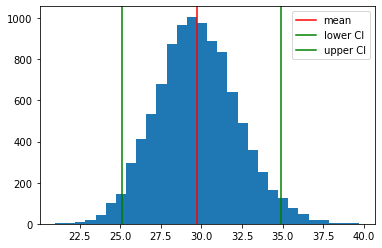

In [508]:
plt.hist(R,bins=30)
plt.axvline(np.mean(R),color='red',label='mean')
q1=round(np.quantile(R,q=0.025),4)
q2=round(np.quantile(R,q=0.975),4)
plt.axvline(q1,color='green',label='lower CI')
plt.axvline(q2,color='green',label='upper CI')
plt.legend()
print('mean value:',round(np.mean(R),4))
print("se of mean value:",round(math.sqrt(np.var(R)),4))
print('confidence interval for mean value is [{} , {}]' .format (q1,q2))

In [482]:
def bootstrap_var(sample,B=2000,seed=1,func=None):
    Boot=[]
    random.seed(seed)
    for iteration in range(B):
        boot_sample=choices(sample,k=len(sample))
        boot_var=np.var(boot_sample,ddof=1)
        Boot.append(boot_var)
    se=math.sqrt(np.var(Boot))
    return (se,Boot)

In [509]:
def bootstrap_ex2(sample,B=2000,seed=1,func=None):
    Boot=[]
    random.seed(seed)
    for iteration in range(B):
        boot_sample=choices(sample,k=len(sample))
        boot_ex2=sum([x**2 for x in boot_sample])/len(boot_sample)
        Boot.append(boot_ex2)
    se=math.sqrt(np.var(Boot))
    return (se,Boot)

In [516]:
random.seed(4)
sample_x=sample(list(s),100)
est_mean=sum([x**2 for x in sample_x])/len(sample_x)
#print("estimated mean:",round(est_mean,4))
#print("estimated var:",round(np.var(sample_x,ddof=1),4))
print(est_mean)

31.2


In [512]:
test=bootstrap_ex2(sample_x,B=3000,seed=1)
se=test[0]
#theory_se=math.sqrt(var/len(sample_x))
print("boostrap estimated standard error:",round(se,4))
#print("standard error:",round(theory_se,4))

boostrap estimated standard error: 2.6662


In [517]:
#bootstrap CI
q1_est=round(np.quantile(test[1],q=0.025),4)
q2_est=round(np.quantile(test[1],q=0.975),4)

#rough CI
q_1=round(est_mean-1.96*se,4)
q_2=round(est_mean+1.96*se,4)

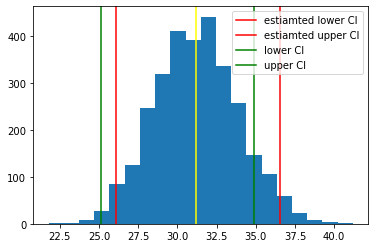

In [518]:
plt.hist(test[1],bins=20)
plt.axvline(q1_est,color='r',label='estiamted lower CI')
plt.axvline(q2_est,color='r',label='estiamted upper CI')
plt.axvline(q1,color='green',label='lower CI')
plt.axvline(q2,color='green',label='upper CI')
plt.axvline(np.mean(test[1]),color='yellow')
plt.legend(loc='best')


In [519]:
print('real CI [{} , {}]' .format (q1,q2))
print('estimated CI [{} , {}]' .format (q1_est,q2_est))
print('rough CI [{} , {}]' .format (q_1,q_2))

real CI [25.0998 , 34.9002]
estimated CI [26.1097 , 36.5302]
rough CI [25.9742 , 36.4258]


plt.hist(V,bins=30)
plt.axvline(np.mean(V),color='red',label='mean')
q1=round(np.quantile(V,q=0.025),4)
q2=round(np.quantile(V,q=0.975),4)
plt.axvline(q1,color='green',label='lower CI')
plt.axvline(q2,color='green',label='upper CI')
plt.legend()
print('mean value:',round(np.mean(V),4))
print("se of mean value:",round(math.sqrt(np.var(V)),4))
print('confidence interval for mean value is [{} , {}]' .format (q1,q2))